In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import arange
from numpy import linalg

In [2]:
df=np.loadtxt("NLS_Group05.txt",skiprows=1)

In [3]:
class1 = df[:1303]
class2 = df[1303:]

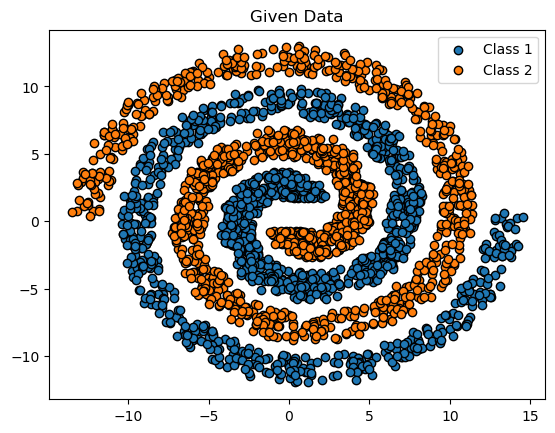

In [4]:
plt.scatter(class1[:,0], class1[:,1],edgecolors='black')
plt.scatter(class2[:,0], class2[:,1],edgecolors='black')
plt.legend(['Class 1','Class 2'])
plt.title("Given Data")
plt.show()

In [5]:
training1=class1[:int(0.7*1303)]
testing1=class1[int(0.7*1303):]
training2=class2[:int(0.7*1303)]
testing2=class2[int(0.7*1303):]

In [6]:
# training =np.append(training1,training2,axis=0)
# testing =np.append(testing1,testing2,axis=0)

Training the data

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

In [8]:
def add_label(x1,x2):
    x3=np.append(x1,x2,axis=0)
    m , n =x3.shape
    y=[]
    for i in range(m):
        if i<len(x1):
            y.append(0)
        else:
            y.append(1)
    return x3,y

In [9]:
def training(x,y):
    m, n = x.shape
    w = np.array([0.1,0.2,0.3])
    err = []
    avg_err = []
    epochs = 100
    for epochs in range(epochs):
        for i in range(m):
            xi = [1, x[i, 0], x[i, 1]]
            a = np.dot(w.T, xi)
            s=sigmoid(a)
            
            error = 0.5*(y[i]-s)**2
            lr = 0.001
            err.append(error)

            del_not = lr*(y[i]-s)*s*(1-s)
            del_w = np.dot(del_not, xi)
            w = w + del_w    #error updation
        error_avg = sum(err)/len(err)
        avg_err.append(error_avg)
        
    print("new weight: ", w)
    print("Average Error: ", round(error_avg, 5))
    
    return w, avg_err

In [10]:
class1v2Tr,y1= add_label(training1,training2)
w12, avg_err12 = training(class1v2Tr, y1)

new weight:  [-0.01279939  0.02442713  0.10948996]
Average Error:  0.11748


In [11]:
def classifier(xn, w):
    
    m, n = xn.shape
    yp = []
    
    for i in range(m):
        xi = [1, xn[i, 0], xn[i, 1]]
        an = np.dot(w.T, xi)
        yi = sigmoid(an)
        yp.append(yi)

    return yp

In [12]:
def decision_boundary(all_points, data, w, name):
    
    c1x_, c2x_, c1y_, c2y_ = [], [], [], []
    c1, c2 = [], []
    
    yp = classifier(all_points, w)
#     print(yp)
    m, n = all_points.shape
    for i in range(m):
        if yp[i] < 0.5:
            c1x_.append(all_points[i, 0])
            
            c1y_.append(all_points[i, 1])
            
            c1.append((all_points[i, 0],all_points[i, 1]))
        else:
            c2x_.append(all_points[i, 0])
           
            c2y_.append(all_points[i, 1])
            
            c2.append((all_points[i, 0],all_points[i, 1]))
#     print(c1x_)
#     print(c1y_)
#     print(c2x_)
#     print(c2y_)
    plt.scatter(c1x_, c1y_, marker='s', s=500)
    plt.scatter(c2x_, c2y_, marker='s', s=500)
    plt.legend(['Class '+name[0],'Class '+name[1]])
    plt.scatter(data[:,:1], data[:,1:2], edgecolors='black')

    plt.title("Decision Boundary (Class"+name[0]+name[1]+")")
    plt.tight_layout()
    plt.show()
    
    return [c1, c2]

In [13]:
max_x_val = int(max([max(class1[0]), max(class2[0])]))
min_x_val = int(min([min(class1[0]), min(class2[0])]))
max_y_val = int(max([max(class1[1]), max(class2[1])]))
min_y_val = int(min([min(class1[1]), min(class2[1])]))

In [14]:
min_x_val

-8

In [15]:
all_points = []
for i in range(min_x_val-10, max_x_val+10):
    for j in range(min_y_val-5, max_y_val+5):
        all_points.append([i, j])
all_points=np.array(all_points)
print(all_points)
#all_points

[[-18 -13]
 [-18 -12]
 [-18 -11]
 ...
 [ 18  11]
 [ 18  12]
 [ 18  13]]


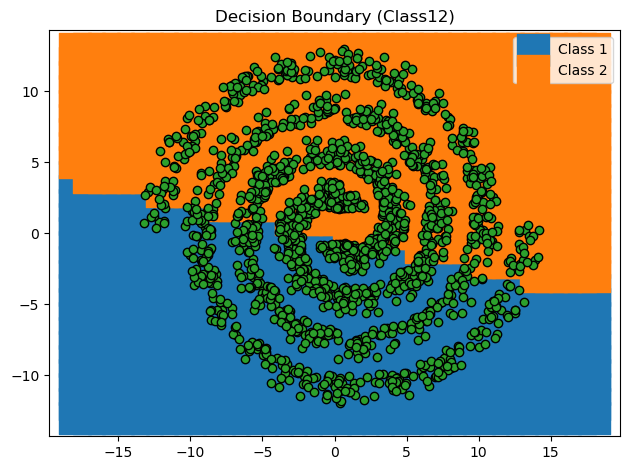

In [16]:
class1v2Tr ,y1=add_label(training1,training2)
b12 = decision_boundary(all_points, class1v2Tr, w12, ['1', '2'])

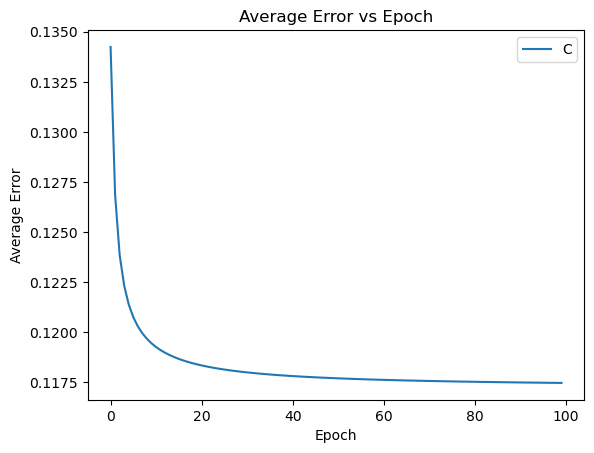

In [17]:
plt.plot(avg_err12)
plt.legend("Class1")
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()

In [19]:
def confusion_matrix(predicted, k):
    matrix = 0
    predicted = convert_labels(predicted)
    c1, c2 = 0, 0
    for i in range(len(predicted)):
        if i<k and predicted[i] == 0:
            c1 += 1
        elif i<k and predicted[i] == 1:
            c2 += 1
    print("c1",c1,"c2",c2,"k",k)       
    return [[c1, k-c1], [c2, k-c2]]

In [20]:
def convert_labels(x):
    prediction = []
    for val in x:
        if val<0.5:
            prediction.append(0)
        else:
            prediction.append(1)

    return np.array(prediction)

In [22]:
pred12 = classifier(class1v2Tr, w12)
matrix12 = confusion_matrix(pred12, len(testing1))
matrix12

c1 215 c2 176 k 391


[[215, 176], [176, 215]]